<a href="https://colab.research.google.com/github/gui-pardo/trabalhoRedes2/blob/main/TrabalhoRedes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0b1101000011001010110110001101100011011110010000001100011011011110110110101110000


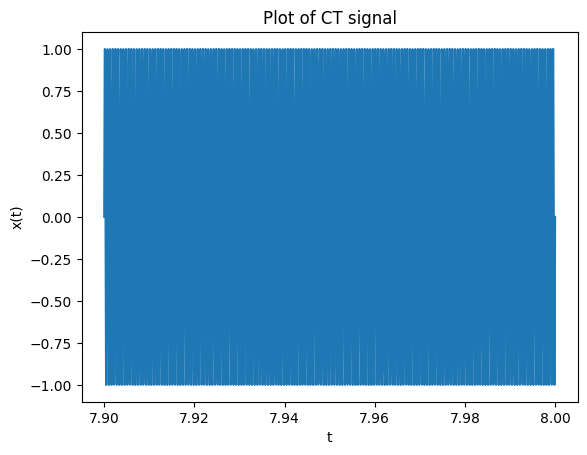

1700.0
Value in index  10400  is 0.25
Freq:  1300.0


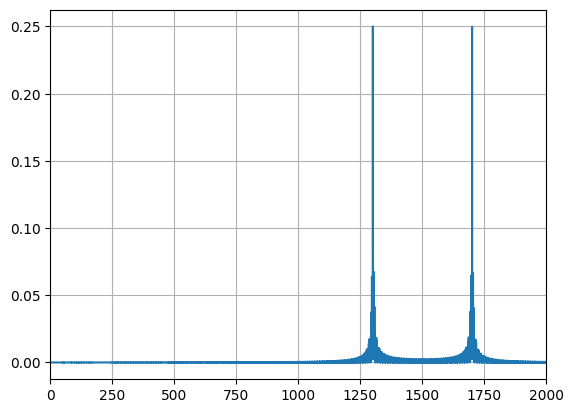

hello comp


In [ ]:
from numpy.core.shape_base import hstack
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.fft import fft, fftfreq
import pandas as pd
import binascii
import array 

# -------------------=FUNÇÕES=-------------------

#criação de seno
def cont_sin(time, sample_rate, frequency):
    time = time
    sample = sample_rate
    f = frequency
    t = np.linspace(time, time+0.1, sample)
    signal = np.sin(2*np.pi*f*t)
    return t,signal

# -------------------MODULAÇÃO-------------------

#padrões de frequencia
Fs = 10000
T = 0
fc1 = 1300 #1
fc2 = 1700 #0

#construindo mensagem
ascii_message = 'hello comp'
message = bin(int.from_bytes(ascii_message.encode(), 'big'))
print(message)
len_message = len(ascii_message)

#extraindo o b da mensagem
bin_message = '0'+message[2:]

#cria matriz de amostras do tamanho da mensagem
freq_bin_message = np.zeros(len(bin_message))
len(freq_bin_message)

#preenche vetor freq_bin_message com a frequencia de cada elemento 
for frq   in range(len(bin_message))  :
  if bin_message[frq] == '0':
    freq_bin_message[frq] = fc2
  else:
    freq_bin_message[frq] = fc1

#criando sinal
signal = np.zeros(0)
t=np.zeros(0)

#dica: usar hstack do numpy, a função cont_sin() passando como parâmentro a frequência que representa o bit na mensagem
#      e incrementar em 0.1 o valor de T para gerar o deslocamento de tempo de bit em 0,1 segundos
for frq in  range(80):
  frq, signal_f= cont_sin(T, Fs, freq_bin_message[frq])
  signal = np.hstack((signal, signal_f))
  t = np.hstack((t, frq))

  T += 0.1
    

plt.plot(frq, signal_f)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal')
#plt.xlim([0, 0.001])
plt.show()

N = 1000
T = 1/10000
yf = fft(signal_f)
xf = fftfreq(N, T )[:N//2]
print( xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))])


#espectro do sinal
#print(t)
T = 0.1/Fs # calcular o período do sinal 0.001 -> 1/T = 1000
N = signal.size
#print(signal.shape)

f = fftfreq(len(signal), T)
frequencias = f[:N // 2]
amplitudes = np.abs(fft(signal))[:N // 2] * 1 / N


print("Value in index ",np.argmax(amplitudes), " is %.2f" %amplitudes[np.argmax(amplitudes)])
print("Freq: " ,frequencias[np.argmax(amplitudes)])
plt.plot(frequencias, amplitudes)
plt.grid()
plt.xlim([0, 2000])
plt.show()

#----------------------- Demodulador -----------------------

#string_demodulada = '' #usar para converter string_demodulada após a conversão de frequências em 0 ou 1

samples_bit = 10000





for bit_position in range(len(freq_bin_message)):

 samples_bit =  [freq_bin_message]

 #print(samples_bit)



 
 
       #capturar uma quantidade de valores do sinal (vetor) dentro do tempo de bit adequado
           
  #pegar o valor signal e percorrer um vetor, utilizando um vetor auxiliar.    
 T =1/10000 #calcular o perído de amostragem (1/F sendo F 10000 Hz)
 N = 10000
 
  #aplicar FFT para saber qual é a frequência
 f = fftfreq(len(signal), T)
 frequencias = f[:N // 2]
 amplitudes = np.abs(fft(freq_bin_message))[:N // 2] * 1 / N
 

 

    #parte onde é verificado se o bit (com uma quantidade de amostras que são usadas para detectar se é 0 ou 1) analisa se é 0 ou 1
 if freq_bin_message[bit_position] == 1300:
  freq_bin_message[bit_position] = 0
 elif freq_bin_message[bit_position] ==1700:
  freq_bin_message[bit_position] = 1

     



      
      
# Converter Mensagem

n = int('0b1101000011001010110110001101100011011110010000001100011011011110110110101110000', 2)
amostras_array = n.to_bytes((n.bit_length() + 7)//8, 'big').decode()                                                                   
binascii.unhexlify('%x' % n)
print(amostras_array)
#print(string_demodulada)